# Exploratory Data Analysis on Real Estate Data

# Task

__The data__
- The dataset can be found in the file "King_County_House_prices_dataset.csv", in this folder.
- The description of the column names can be found in the column_names.md file in this repository.
- The column names are NOT clear at times.
In the real world we will run into similar challenges. We would then go ask our business stakeholders for more information. In this case, let us assume our business stakeholder who would give us information, left the company. Meaning we would have to identify and look up what each column names might actually mean.


__Tasks for you__
1. Through statistical analysis/EDA, above please come up with AT LEAST 3 (you can definitely get bonus points for more than 3) recommendations for home sellers and/or buyers in King County.
2. Then model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.
3. Acceptable R squared values = 0.7 to 0.9
4. Optional: 

    a. Split the dataset into a train and a test set. 
    
    b. Use Root Mean Squared Error (RMSE) as your metric of success and try to minimize this score on your test data.


__The Deliverables__
1. A well documented Jupyter Notebook containing any code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project (latest upload: 17.09.2020 11:00).
2. An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A short Keynote/PowerPoint/Google Slides presentation giving a high-level overview of your methodology and recommendations for non-technical stakeholders. The duration of the presentation should be 10 minutes, then the discussion will continue for 5 minutes. Also put your slides (delivered as a PDF export) on Github to get a well-rounded project.


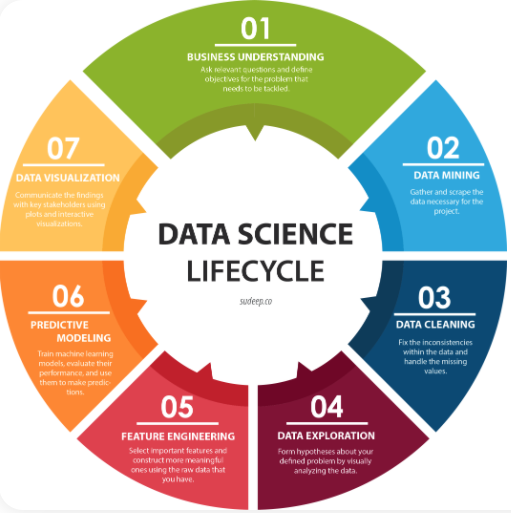

# 01 Business Understanding
_Ask relevant questions and define objectives for the problem that needs to be tackled._

__Basic Input__


- King County (source, wikipedia: https://en.wikipedia.org/wiki/King_County,_Washington):
    - population was 2,252,782 in the 2019 (Wikipedia)
    - Of the 789,232 households, 29.2% had children under the age of 18 living with them, 45.3% were married couples living together, 9.1% had a female householder with no husband present, 41.5% were non-families, and 31.0% of all households were made up of individuals. The average household size was 2.40 and the average family size was 3.05. The median age was 37.1 years.
    - The median income for a household in the county was $68,065 and the median income for a family was $87,010. Males had a median income of $62,373 versus $45,761 for females. The per capita income for the county was $38,211. About 6.4% of families and 10.2% of the population were below the poverty line, including 12.5% of those under age 18 and 8.6% of those age 65 or over.[34]

__Initial Thoughts__
- Potential questions to answer:
    - Where can I get best value for money in terms of e.g. livingsquare, a waterfront good condition, etc.
    - Which features have the strongest impact on the price?
    - Over time, what were the calculated tco for the purchase of a house, combining loan interests and purchase price?
    - Based on the zipcode: Are there differences regarding the increase / decrease of prices
    - What’s the best time to buy a house
    - Think like “if you want to have features x, y, z, than look for...”
    - Check for outliers


__Potential additional sources__
- Purchase price / rent price ratio
- poverty rate
- crime rate
- no / locations of schools, kindergardens, parks, sights, big employers

<font color=dark red>Think about using that command later:</font>

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 02 Data Mining
_Gather and scrape the data necessary for the project._


### Importing the data 

In [274]:
# reset namespace:

In [275]:
reset -fs

In [421]:
# load standard library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from pandas.plotting import scatter_matrix

%matplotlib inline

# load additional packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [277]:
# loading the initial dataframe
X = pd.read_csv("data/King_County_House_prices_dataset.csv")

### Getting a first overview of the data

#### Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [278]:
X.sort_values("date").head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12076,5437600140,1/10/2015,325000.0,4,2.5,2240,5105,2.0,0.0,0.0,...,8,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288
19359,2215450100,1/12/2015,330000.0,4,2.5,2240,7589,2.0,0.0,0.0,...,8,2240,0.0,1994,NaN,98030,47.3824,-122.207,2250,7300
2548,4322300340,1/12/2015,265000.0,4,1.5,1740,12728,1.0,0.0,0.0,...,7,1180,560.0,1964,0.0,98003,47.2808,-122.300,1830,11125
18398,2523039310,1/12/2015,359000.0,4,2.5,1820,11325,1.0,NaN,0.0,...,8,1390,430.0,1976,0.0,98166,47.4574,-122.361,1990,10802
11086,3816300105,1/12/2015,435000.0,4,2.5,2060,10125,2.0,0.0,0.0,...,7,1560,500.0,1979,0.0,98028,47.7640,-122.262,1760,9876


In [279]:
X.sort_values("date").tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19256,2391600735,9/9/2014,550000.0,3,1.50,1730,5750,1.0,0.0,0.0,...,7,1250,480.0,1947,NaN,98116,47.5645,-122.397,1370,5750
66,3394100030,9/9/2014,975000.0,4,2.50,2720,11049,2.0,NaN,0.0,...,10,2720,0.0,1989,0.0,98004,47.5815,-122.192,2750,11049
20288,8080400177,9/9/2014,520000.0,2,1.75,1340,1368,2.0,0.0,0.0,...,7,1060,280.0,2006,0.0,98122,47.6180,-122.311,2480,1707
12438,1328330510,9/9/2014,344950.0,3,1.75,1870,7500,1.0,0.0,0.0,...,8,1320,550.0,1978,0.0,98058,47.4428,-122.134,1870,7275
15702,3294700101,9/9/2014,295000.0,2,1.75,1050,6500,1.5,0.0,2.0,...,6,1050,0.0,1925,0.0,98055,47.4727,-122.200,1320,10075


In [280]:
X.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4456,4019301500,8/28/2014,507000.0,3,2.25,2210,11585,1.0,0.0,0.0,...,7,1510,700.0,1958,NaN,98155,47.7574,-122.279,1870,14092
7905,2896400300,3/19/2015,435000.0,4,2.25,1780,2684,2.0,0.0,0.0,...,7,1780,0.0,2002,0.0,98072,47.7642,-122.149,1670,2426
1936,6114400136,7/14/2014,608250.0,4,2.75,3030,21780,2.0,0.0,0.0,...,8,3030,0.0,1986,0.0,98166,47.4481,-122.338,3020,28027
2171,1796381070,6/25/2014,270000.0,3,2.50,1670,8364,1.0,0.0,0.0,...,7,1300,370.0,1990,0.0,98042,47.3690,-122.084,1490,8143
10096,8581200240,4/29/2015,255000.0,3,1.75,1740,8800,1.0,0.0,0.0,...,7,1140,600.0,1978,0.0,98023,47.2968,-122.372,1690,7920
728,2525000510,11/6/2014,328000.0,3,1.75,1470,7650,1.0,0.0,0.0,...,7,1130,340.0,1983,0.0,98059,47.4818,-122.161,1590,7500
6116,6668900020,3/18/2015,420550.0,4,2.00,1370,8100,1.0,NaN,0.0,...,7,1370,0.0,1947,0.0,98155,47.7490,-122.312,1280,8100
12373,2923500550,6/25/2014,599990.0,3,2.25,2680,9162,1.0,0.0,0.0,...,8,1570,1110.0,1978,0.0,98027,47.5683,-122.091,2480,8261
2129,2592400550,7/9/2014,463000.0,4,2.50,1980,6660,2.0,0.0,0.0,...,7,1980,0.0,1974,0.0,98034,47.7158,-122.167,1980,7150
15877,9474700020,5/3/2014,310000.0,3,1.00,1010,9945,1.0,0.0,0.0,...,6,1010,0.0,1973,0.0,98065,47.5324,-121.763,1390,12710


In [281]:
X.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [282]:
# gain general overview over data structure
X.info()

# shows missings at waterfront, view, yr_renovated missing
# two "object" - not possible to compute these columns without transformation or cleaning (date, sqft_basemend)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Adding additional data

In [425]:
# loading the initial dataframe
Z = pd.read_csv("data/King_County_Sheriff_s_Office_-_Incident_Dataset.csv")

In [426]:
Z.head()

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19045456,11/27/2019 02:10:00 PM,Other,377,8700 Block 250TH AVE NE,REDMOND,WA,98053,12/02/2019 11:55:00 PM,12/03/2019 01:47:00 AM,14,Wednesday,POINT (-122.00566700000002 47.679241)
1,C19045392,11/27/2019 08:00:00 AM,Traffic,427,BECKLER RD & MP 4.6,SKYKOMISH,WA,98288,12/02/2019 10:25:00 PM,12/03/2019 12:16:00 AM,8,Wednesday,NaN
2,C19047596,11/20/2019 11:38:00 AM,Property Crime,331,NFD 6028 & HWY 2,BARING,WA,5474,12/17/2019 11:15:00 PM,12/17/2019 11:56:00 PM,11,Wednesday,NaN
3,C19044352,11/19/2019 02:38:00 PM,Drugs,200,1 Block AVE S & S KING ST,SEATTLE,WA,98144,12/02/2019 05:05:00 PM,12/02/2019 06:56:00 PM,14,Tuesday,NaN
4,C19044243,11/18/2019 11:06:00 PM,Traffic,404,I,KENT,WA,NaN,11/26/2019 08:55:00 PM,11/26/2019 10:46:00 PM,23,Monday,NaN


In [439]:
Z.zip = pd.to_numeric(Z.zip, errors="coerce")

In [443]:
Z = Z.query("98001 <= zip <= 98199")

In [445]:
Z.shape

(19836, 13)

In [447]:
Z.groupby("incident_type").count()

,case_number,incident_datetime,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
incident_type,,,,,,,,,,,,
Arson,81,81,81,81,81,81,81,81,81,81,81,71
Assault,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1370
Assault with Deadly Weapon,57,57,57,57,57,57,57,57,57,57,57,51
Breaking & Entering,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1138
Community Policing,445,445,445,445,445,445,445,445,445,445,445,404
Death,427,427,427,427,427,427,427,427,427,427,427,402
Disorder,272,272,272,272,272,272,272,272,272,272,272,227
Drugs,464,464,464,464,464,464,464,464,464,464,464,364
Fire,206,206,206,206,206,206,206,206,206,206,206,182


In [514]:
ZX = pd.DataFrame()
ZX["crimes"] = Z["zip"].value_counts()
ZX["property_inc"] = Z[Z["incident_type"] == "Property Crime"]["zip"].value_counts()
ZX["zipcode"] = ZX.index
ZX.fillna(0, inplace=True)
ZX = ZX.astype({"zipcode": "object"})
ZX


,crimes,property_inc,zipcode
98178.0,1841,226.0,98178
98146.0,1716,256.0,98146
98058.0,1423,162.0,98058
98001.0,1313,165.0,98001
98104.0,871,54.0,98104
98168.0,853,96.0,98168
98106.0,788,108.0,98106
98042.0,670,92.0,98042
98059.0,574,59.0,98059
98038.0,558,63.0,98038


In [515]:
X = pd.merge(X, ZX, on="zipcode", how="left")

## 03 Data Cleaning
_Fix the inconsistencies within the data and handle the missing values._


### Missing values:

                Count  Percentage
waterfront       2376        11.0
view               63         0.3
yr_renovated     3842        17.8
incidents          50         0.2
property_inc_x     50         0.2
crimes             50         0.2
property_inc_y     50         0.2


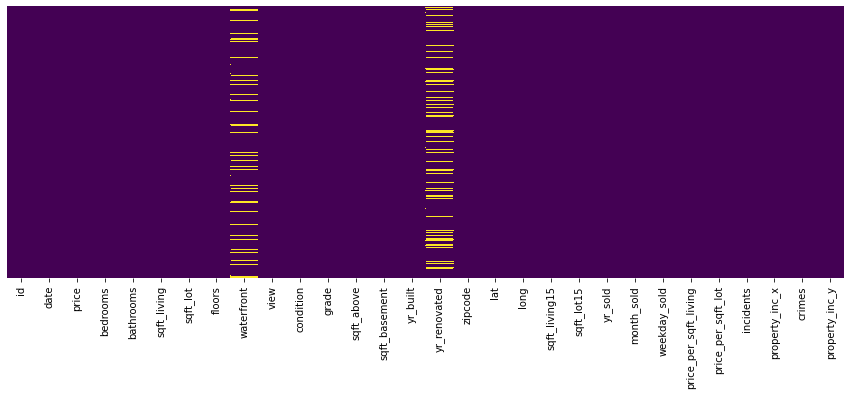

In [516]:
# check for na_values
nan = pd.DataFrame(X.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/X.shape[0]*100,1)
print(nan[nan.Count!=0])

# show heatmap of all null values in the dataset
fig, ax = plt.subplots(figsize=(15,5)) 
ax = sns.heatmap(X.isnull(), yticklabels=False, cbar=False, cmap="viridis");


4 out of 24 colums have missing values:
 - **waterfront** has 2.376 (11%) missing values
 - **view** 63 entries do not provide a view value (0.3%)
 - **yr_renovated** is lacking 3842 (17.8 values) 
 - **sqft_basement**: After dropping the non numerical values, 2.1% entries (count = 454) are missing ta value

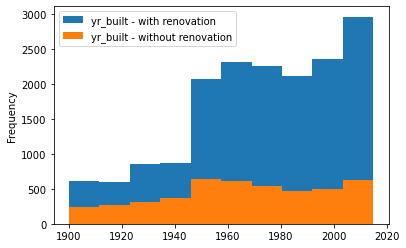

In [517]:
wo_renovation = X.query("yr_renovated == 0").yr_built
with_renovation = X.query("yr_renovated != 0").yr_built
wo_renovation.plot(kind="hist")
with_renovation.plot(kind="hist")
plt.legend(["yr_built - with renovation", "yr_built - without renovation"]);



It appears unlikely, that houses older than 40 years and more have never been renovated. Hence, the "0"-values in yr_renovated are probably a sign of missing data too.

### Checking and cleaning data types

**Date** and **sqft_basement** are type object and should be transformed / cleand for further processing.

In [519]:
# transform date object to dtype pd.datetime
X.date = pd.to_datetime(X.date)

# for easier comparison create additional "yr_sold" column and use instead of date
X["yr_sold"], X["month_sold"], X["weekday_sold"] = X.date.dt.year, X.date.dt.month, X.date.dt.dayofweek

# convert string values to numeric if possible, drop values otherwise
X.sqft_basement = pd.to_numeric(X.sqft_basement, errors="coerce")

# convert float type to bool.
X = X.astype({"waterfront": "object", "floors":"object", "view":"object", "zipcode": "object"})
X.dtypes

id                                int64
date                     datetime64[ns]
price                           float64
bedrooms                          int64
bathrooms                       float64
sqft_living                       int64
sqft_lot                          int64
floors                           object
waterfront                       object
view                             object
condition                         int64
grade                             int64
sqft_above                        int64
sqft_basement                   float64
yr_built                          int64
yr_renovated                    float64
zipcode                          object
lat                             float64
long                            float64
sqft_living15                     int64
sqft_lot15                        int64
yr_sold                           int64
month_sold                        int64
weekday_sold                      int64
price_per_sqft_living           float64


In [536]:
# Filling missing values in column sqft_basement
X.sqft_basement = X.sqft_basement.fillna(X.sqft_basement.mean())
X.crimes = X.crimes.fillna(0)

### Duplicate IDs

In [537]:
n_dups = X[X.id.duplicated()].count().id
max_dups = X[X.id.duplicated(keep=False)].id.value_counts().max()

print(f"Duplicate ids found in dataset: {n_dups}.\nMax occurence of same id: {max_dups}")


Duplicate ids found in dataset: 177.
Max occurence of same id: 3


Inference: 177 Houses were sold multiple times during observed period.

### Outliers
While observing the basic statistics, several indicators for whide-spreaded results and propably some outliers can be found. Therefor, we'll have a closer look at least on the values for our label variabel:

#### Prices 

,price
count,21597.0
mean,540296.6
std,367368.1
min,78000.0
10%,245000.0
25%,322000.0
50%,450000.0
75%,645000.0
90%,887000.0
99%,1970000.0


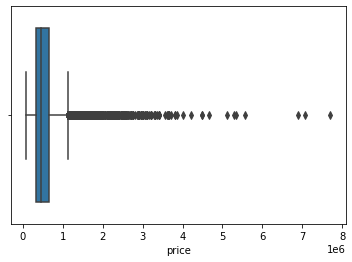

In [538]:
sns.boxplot(X.price);
prices = pd.DataFrame(round(X.price.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]),1))
prices


The mean is much higher than the median, which indicates clearly a right-skewed distribution. In order to get a more represantative result, the datasets with prices > 90% quantile has been removed from the dataset.

#### Attributes 

,bedrooms
count,21597.0
mean,3.4
std,0.9
min,1.0
10%,2.0
25%,3.0
50%,3.0
75%,4.0
90%,4.0
99%,6.0


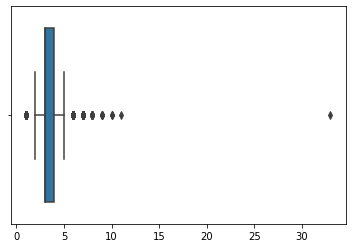

In [523]:
sns.boxplot([X.bedrooms])
bedrooms = pd.DataFrame(round(X.bedrooms.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]),1))
bedrooms

,bathrooms
count,21597.0
mean,2.1
std,0.8
min,0.5
10%,1.0
25%,1.8
50%,2.2
75%,2.5
90%,3.0
99%,4.2


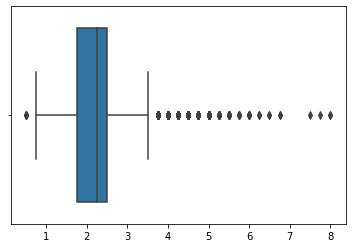

In [294]:
sns.boxplot([X.bathrooms])
bathrooms = pd.DataFrame(round(X.bathrooms.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]),1))
bathrooms

,sqft_lot
count,21597.0
mean,15099.4
std,41412.6
min,520.0
10%,3322.6
25%,5040.0
50%,7618.0
75%,10685.0
90%,21371.6
95%,43307.2


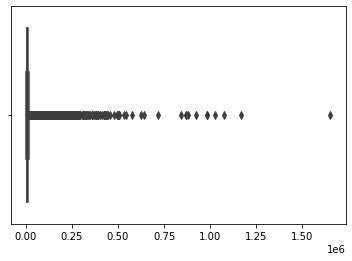

In [297]:
sns.boxplot([X.sqft_lot])
sqft_lot = pd.DataFrame(round(X.sqft_lot.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95]),1))
sqft_lot

In [539]:
X.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,...,sqft_lot15,yr_sold,month_sold,weekday_sold,price_per_sqft_living,price_per_sqft_lot,incidents,property_inc_x,crimes,property_inc_y
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,...,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21547.0,21547.0,21597.0,21547.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,3.0,8.0,1789.0,292.0,...,12758.0,2014.0,7.0,2.0,264.0,89.0,269.0,31.0,268.0,31.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,1.0,828.0,438.0,...,27274.0,0.0,3.0,1.0,110.0,94.0,394.0,51.0,394.0,51.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,3.0,370.0,0.0,...,651.0,2014.0,1.0,0.0,88.0,0.0,2.0,0.0,0.0,0.0
10%,1.036000e+09,245000.0,2.0,1.0,1090.0,3323.0,3.0,6.0,970.0,0.0,...,3668.0,2014.0,2.0,0.0,146.0,19.0,14.0,0.0,14.0,0.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,3.0,7.0,1190.0,0.0,...,5100.0,2014.0,4.0,1.0,182.0,33.0,24.0,2.0,24.0,2.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,3.0,7.0,1560.0,0.0,...,7620.0,2014.0,6.0,2.0,245.0,59.0,80.0,5.0,73.0,5.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,4.0,8.0,2210.0,550.0,...,10083.0,2015.0,9.0,3.0,318.0,108.0,377.0,40.0,377.0,40.0
90%,8.732030e+09,887000.0,4.0,3.0,3254.0,21372.0,4.0,9.0,2950.0,960.0,...,17822.0,2015.0,11.0,4.0,407.0,191.0,670.0,92.0,670.0,92.0
99%,9.558800e+09,1970000.0,6.0,4.0,4980.0,213008.0,5.0,11.0,4370.0,1660.0,...,157687.0,2015.0,12.0,6.0,632.0,458.0,1841.0,256.0,1841.0,256.0


###  Calculate prices per squarefeet

In [540]:
X["price_per_sqft_living"] = round(X.price/X.sqft_living, 2)
X["price_per_sqft_lot"] = round(X.price/X.sqft_lot, 2)
X.describe()[["price_per_sqft_living","price_per_sqft_lot"]]

,price_per_sqft_living,price_per_sqft_lot
count,21597.000000,21597.000000
mean,264.143331,88.988986
std,110.000058,94.059627
min,87.590000,0.160000
25%,182.290000,33.330000
50%,244.640000,59.260000
75%,318.330000,107.610000
max,810.140000,2019.700000


## 04 Data Exploration
_Form hypotheses about your defined problem by visually analyzing the data._


### Checking for likely categorical values

In [541]:
# check for categorical values
cats = pd.DataFrame(X.nunique(), columns=["UniqueValues"])
cats

,UniqueValues
id,21420
date,372
price,3622
bedrooms,12
bathrooms,29
sqft_living,1034
sqft_lot,9776
floors,6
waterfront,2
view,5


Based on general knowledge it is highly likely that the following variables are categorical:
- zipcode


In [542]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 30 columns):
id                       21597 non-null int64
date                     21597 non-null datetime64[ns]
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null int64
sqft_lot                 21597 non-null int64
floors                   21597 non-null object
waterfront               19221 non-null object
view                     21534 non-null object
condition                21597 non-null int64
grade                    21597 non-null int64
sqft_above               21597 non-null int64
sqft_basement            21597 non-null float64
yr_built                 21597 non-null int64
yr_renovated             17755 non-null float64
zipcode                  21597 non-null object
lat                      21597 non-null float64
long                     21597 non-null 

In [526]:
continuous_var = list(X.select_dtypes(
                        ['int64','float64','bool', "datetime64[ns]"]).columns.values)
# remove non-continuous variables
non_continuous_var = ["id", "zipcode","date", "weekday_sold", "month_sold", "yr_sold" ]
# for x in non_continuous_var:
#     continuous_var.remove(x)
    
categorical_var=["waterfront"]


### Perform Correlation Analysis 

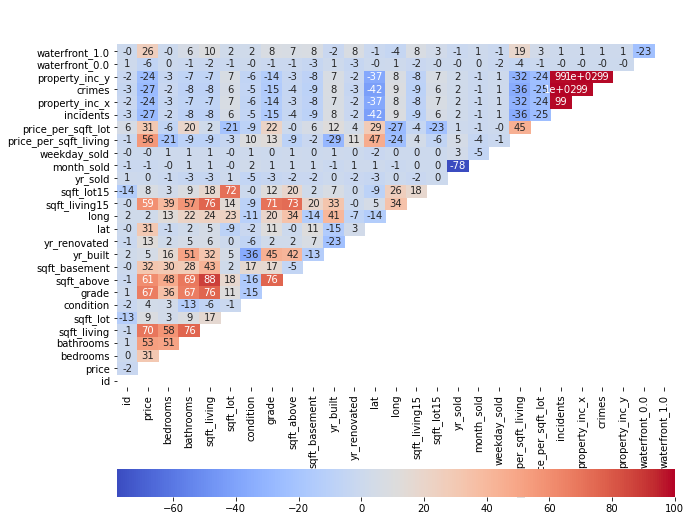

In [543]:
X_dum=pd.get_dummies(X[continuous_var+categorical_var].copy())
X_dum
mask = np.triu(X_dum.corr())
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,cbar_kws= {'orientation': 'horizontal'}
                )
ax.set_ylim((0,30))
plt.savefig('figures/correlogram.png')

Focussing on price, the strongest correlation is found with sqft living, followed by grade, sqft_above and sqft living 15, bathrooms, bedrooms and latitude. 

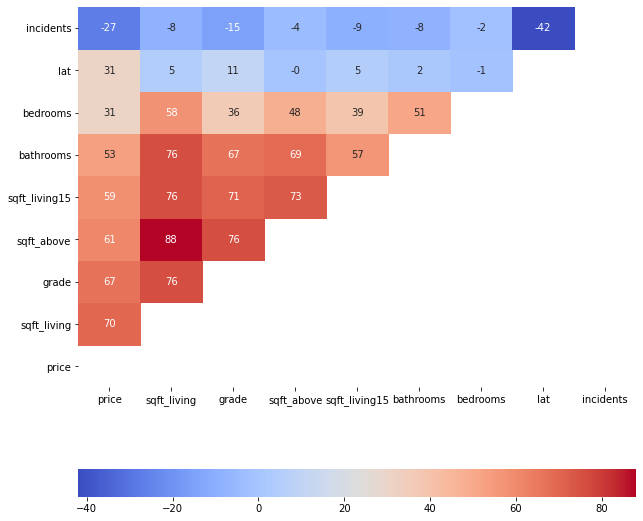

In [544]:
focused_var = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "bedrooms", "lat", "incidents"]
X_dum=pd.get_dummies(X[focused_var].copy())
X_dum
mask = np.triu(X_dum.corr())
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,cbar_kws= {'orientation': 'horizontal'}
                )
ax.set_ylim((0,9))
plt.savefig('figures/correlogram_focus.png')

It's clear to see, that correlation between sqft_above and sqft_living is extremely strong. Therefor, we will avoid using feature **sqft_above** for the modeling.

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, Use

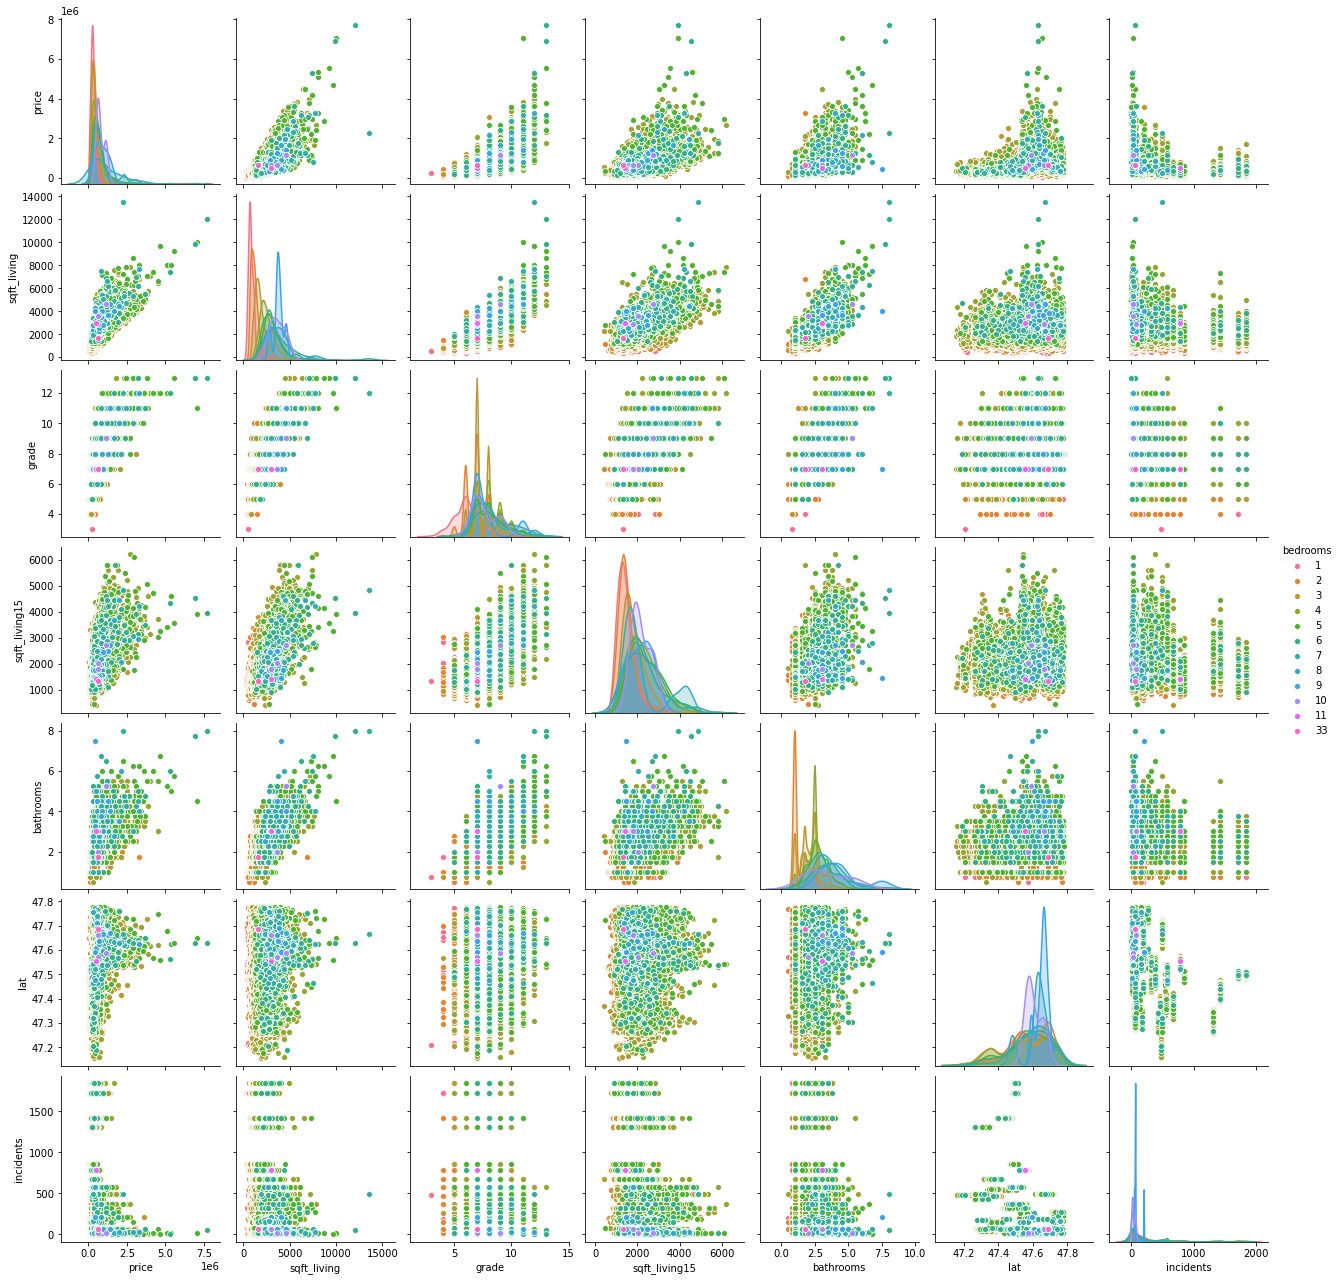

In [505]:
features = focused_var.copy()
features.remove("sqft_above")
shortlist = X[features]
_ =sns.pairplot(shortlist, hue="bedrooms");
plt.savefig('figures/pairplot.png')

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/david/opt/anaconda3/envs/nf/lib

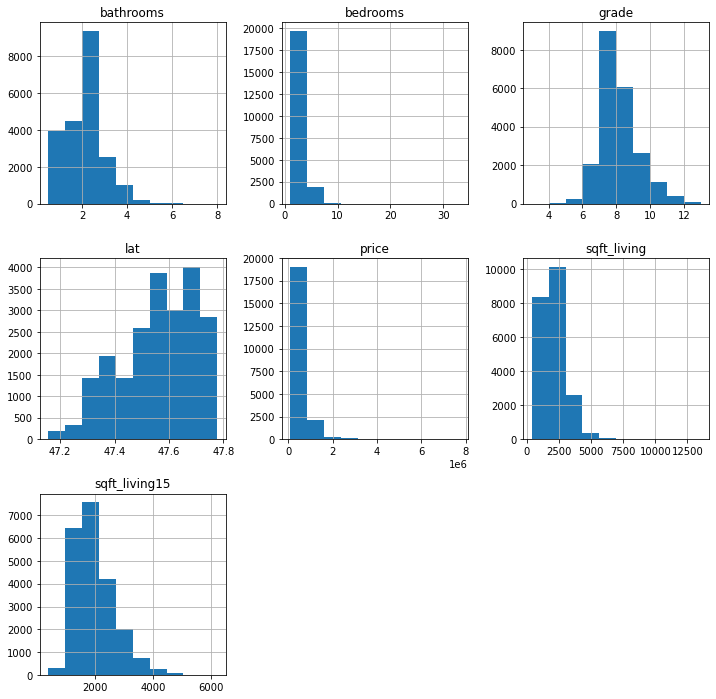

In [385]:
_ = shortlist.hist(figsize=(12,12))
plt.savefig('figures/hist_all.png');

### Going more into detail

#### sqft_living / price 

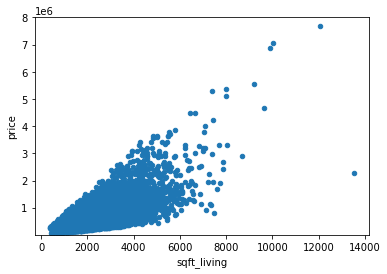

In [545]:
feat = 'sqft_living'
data = pd.concat([X['price'], X[feat]], axis=1)
data.plot.scatter(x=feat, y='price', ylim=(3,8000000));

There is an obvious linear correlation between sqft living and price. Furthermore, we can find some outliers that might have significant impact on the results. A process of cleaning or normalization could be a good idea.

#### sqft_living15 / price

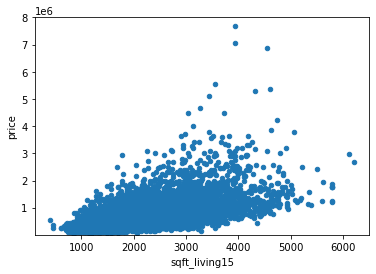

In [546]:
feat = 'sqft_living15'
data = pd.concat([X['price'], X[feat]], axis=1)
data.plot.scatter(x=feat, y='price', ylim=(3,8000000));

The price tends to increase, if the sqft-area of the neighbourhood increases as well.

#### distribution of price values 

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

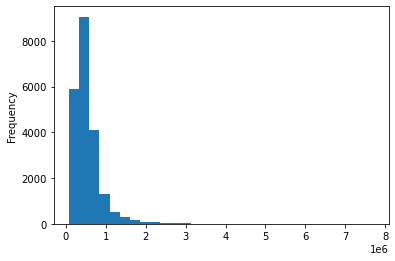

In [547]:
X.price.plot(kind="hist", bins=30)
X.price.describe().round()

The distribution of the prices is extremely right skewd. For further processing, there is some kind of standardization necessary.

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/david/opt/anaconda3/envs/nf/lib

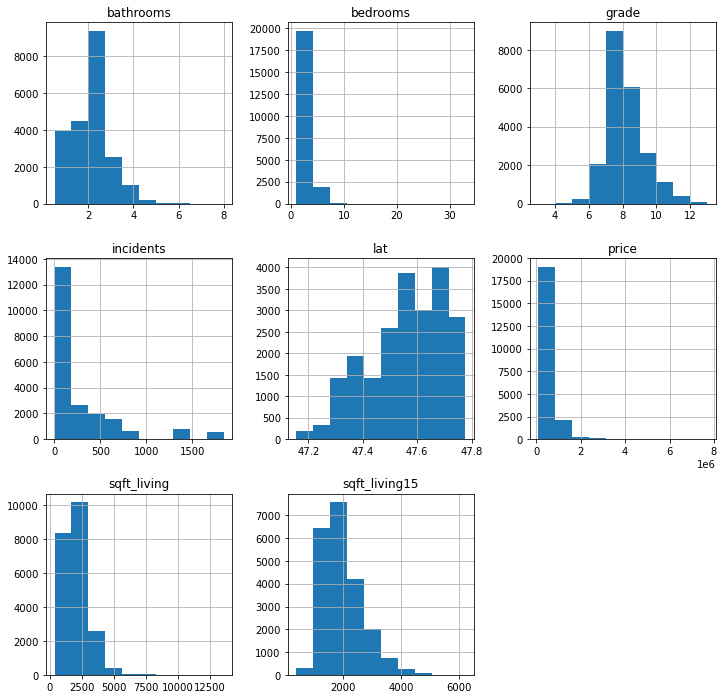

In [548]:
_ = shortlist.hist(figsize=(12,12))
plt.savefig('figures/hist_all.png');

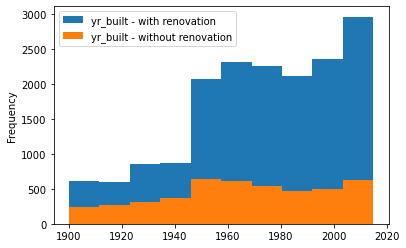

In [309]:
wo_renovation = X.query("yr_renovated == 0").yr_built
with_renovation = X.query("yr_renovated != 0").yr_built
wo_renovation.plot(kind="hist")
with_renovation.plot(kind="hist")
plt.legend(["yr_built - with renovation", "yr_built - without renovation"]);



## 05 Feature Engineering
_Select important features and construct more meaningful ones using the raw date._

### Time series analysis: Developing of purchases

In [549]:
print(f"Time series starts(date sold): {X.date.min()}")
print(f"Time series ends(date sold): {X.date.max()}")

# We have date for a period of about 1 year

Time series starts(date sold): 2014-05-02 00:00:00
Time series ends(date sold): 2015-05-27 00:00:00


In [550]:
# Average house prices per year:
X.groupby("yr_sold").agg({'id':'count', 'price':'mean'}) \
       .rename(columns={'id':'count','price':'mean'}) \
       .reset_index()



,yr_sold,count,mean
0,2014,14622,539350.911777
1,2015,6975,542279.005878


There is a slight increase of prices in 2015 compared to 2014. 

In [551]:
# Average house prices per month:
monthly = X.groupby(["month_sold", "waterfront"]).agg({'id':'count', 'price':'mean'}) \
       .rename(columns={'id':'count','price':'mean'}) \
       .reset_index()
monthly["mean"] = monthly["mean"].apply(lambda x: '%.0f' % x)
monthly.sort_values(["waterfront", "month_sold"])

,month_sold,waterfront,count,mean
0,1,0.0,860,518554
2,2,0.0,1096,506340
4,3,0.0,1648,537577
6,4,0.0,1974,555715
8,5,0.0,2149,547258
10,6,0.0,1891,542509
12,7,0.0,1965,539326
14,8,0.0,1739,526744
16,9,0.0,1548,519678
18,10,0.0,1640,535573


It appears as the prices are significantly higher for purches in summer, than they are during winter!

In [552]:
# Average house prices per weekday:
X.groupby("weekday_sold").agg({'id':'count', 'price':'mean'}) \
       .rename(columns={'id':'count','price':'mean'}) \
       .reset_index()

,weekday_sold,count,mean
0,0,4097,543997.141811
1,1,4710,541261.502123
2,2,4600,538771.465652
3,3,3989,531695.872148
4,4,3684,544427.500000
5,5,287,565065.721254
6,6,230,537212.108696


### Results in case of resale

In [553]:
dups = pd.DataFrame(X[X.id.duplicated(keep=False)])[["id", "date", "price"]]
dups.sort_values(by=["id", "date"], inplace=True)
gob_diff = dups.groupby("id").price.diff()
gob_pct = round(dups.groupby("id").price.pct_change()*100,1)
gob_pct
resales = pd.DataFrame([gob_diff, gob_pct], index=["resale_diff", "resale_perc"])
resales = resales.transpose().dropna()
resales.describe(percentiles=[0.05, 0.25, 0.5, 0.75]).round(0)


,resale_diff,resale_perc
count,177.0,177.0
mean,135796.0,56.0
std,100597.0,47.0
min,-40000.0,-5.0
5%,4000.0,1.0
25%,65000.0,23.0
50%,115450.0,54.0
75%,199000.0,74.0
max,529950.0,322.0


<AxesSubplot:xlabel='resale_diff'>

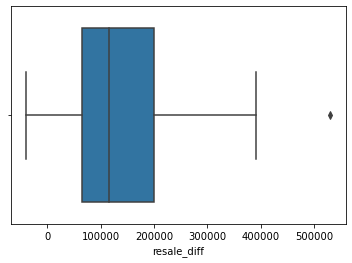

In [554]:
sns.boxplot(data=resales, x=resales.resale_diff)

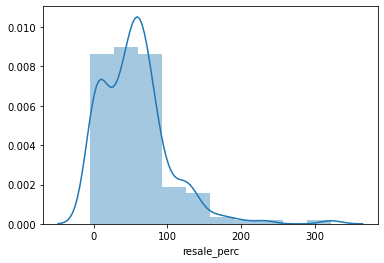

In [316]:
sns.distplot(resales.resale_perc, bins=10);

### Geographical analysis 

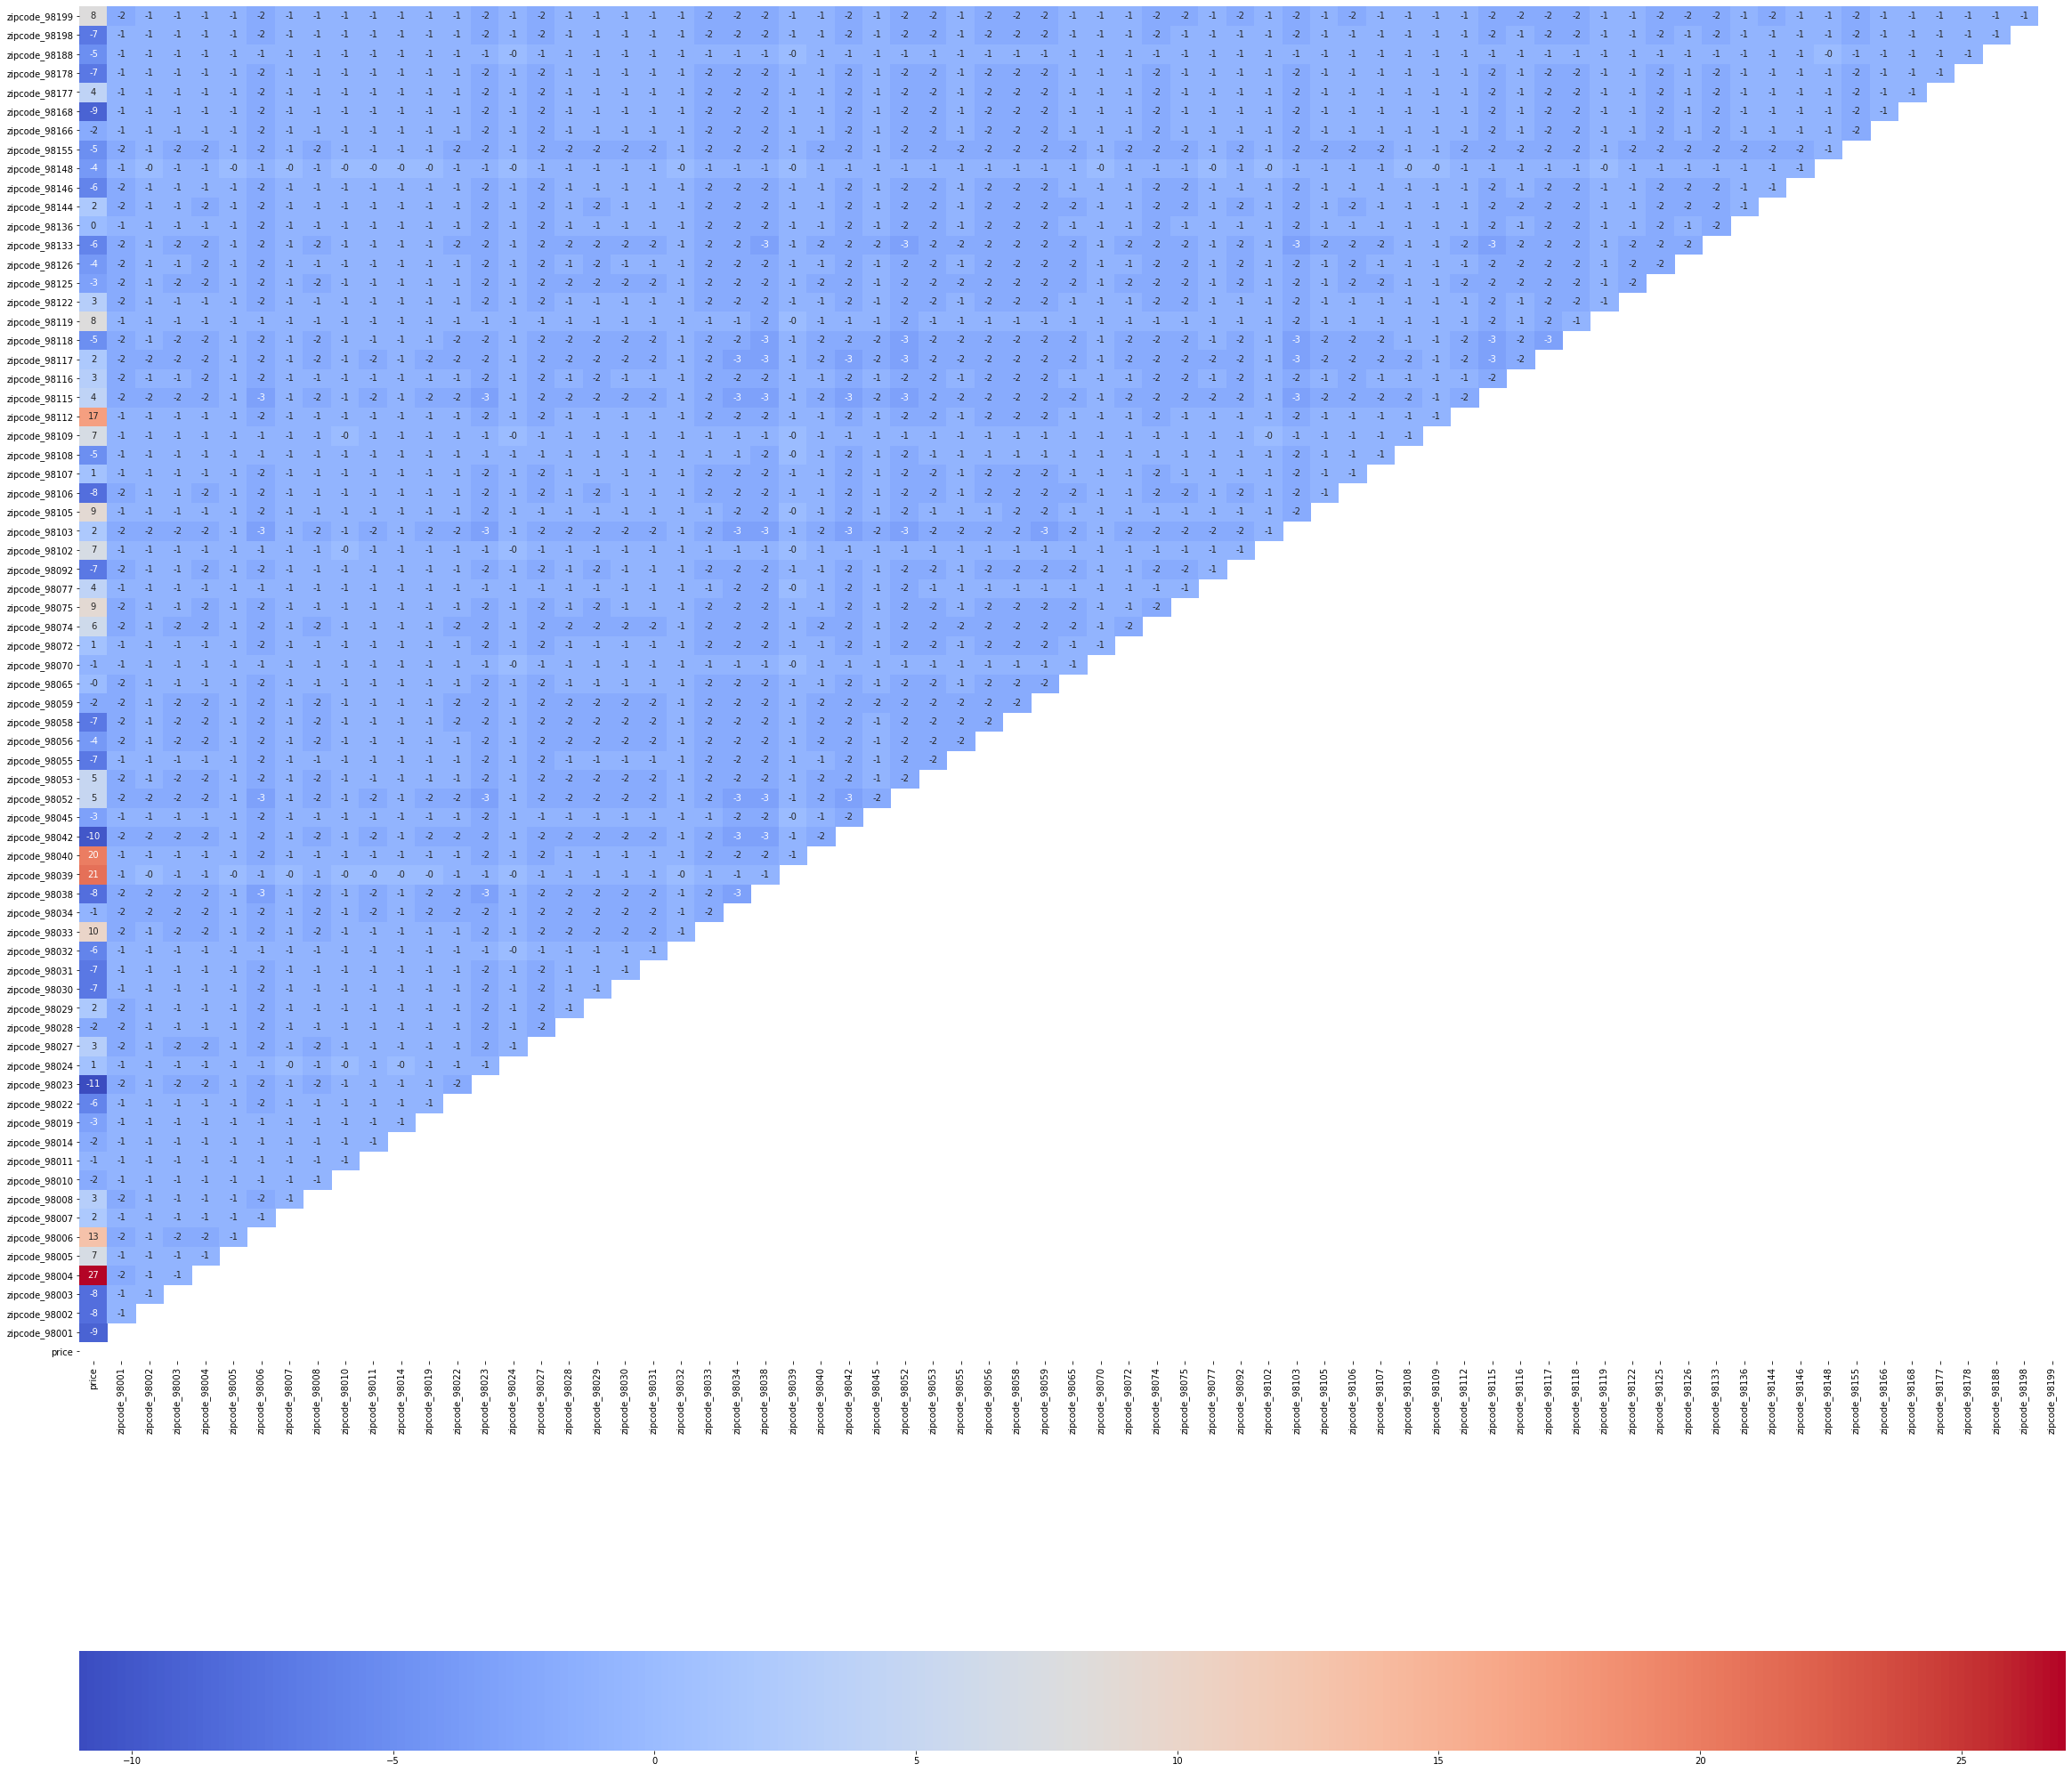

In [436]:
continuous_var = ["price"]
categorical_var = ['zipcode']
X_dum=pd.get_dummies(X[continuous_var+categorical_var].copy())
X_dum
mask = np.triu(X_dum.corr())
fig, ax = plt.subplots(figsize=(40,40)) 
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,cbar_kws= {'orientation': 'horizontal'}
                )
ax.set_ylim((0,71))
plt.savefig('figures/correlogram_zipcodes.png')

In [437]:
X.zipcode.sort_values().unique()

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=object)

<font color="blue">Thoughts:</font>

- If you want to purchase a house for reselling, which house should you buy?
    
    - cluster zipcodes into different regions, analyse figures based on those regions.
    - explore seasonal price development   
    - where can you get "best value for money"



## 06 Predictive Modeling
_Train machine learning models, evaluate their performance, and use them to make predictions._


<font color="blue">Perform linear regression</font>

### Creating dataset

In [567]:
features = ["sqft_living", "sqft_lot", "bathrooms", "bedrooms", "condition", "grade",'sqft_living15', 'sqft_lot15', 'lat', "crimes"]

X2 = X[features]
y = X["price"]

In [568]:
X2.isnull().sum()


sqft_living      0
sqft_lot         0
bathrooms        0
bedrooms         0
condition        0
grade            0
sqft_living15    0
sqft_lot15       0
lat              0
crimes           0
dtype: int64

### Normalising price and sqft_living

<AxesSubplot:ylabel='Frequency'>

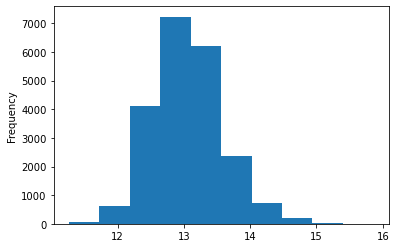

In [569]:
y = np.log(y)
y.plot(kind="hist")

((array([-3.99686021, -3.78162805, -3.66389368, ...,  3.66389368,
          3.78162805,  3.99686021]),
  array([11.26446411, 11.28978191, 11.30220443, ..., 15.74558164,
         15.76995561, 15.85673089])),
 (0.5237502526426185, 13.048210941923953, 0.994519575317681))

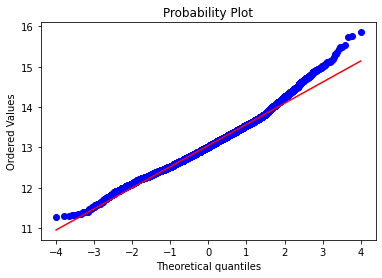

In [570]:
stats.probplot(y, plot=plt)

In [571]:
X2["sqft_living"] = np.log(X2.loc[:,["sqft_living"]])

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


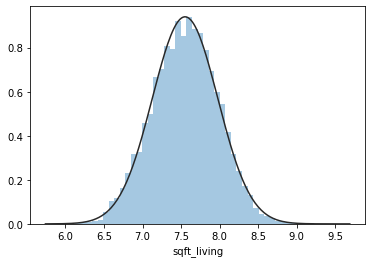

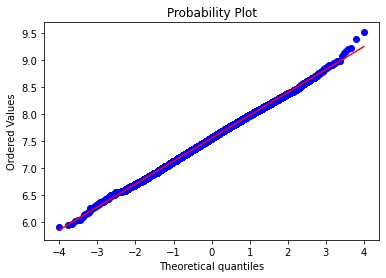

In [572]:
#transformed histogram and normal probability plot
sns.distplot(X2['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(X2['sqft_living'], plot=plt)

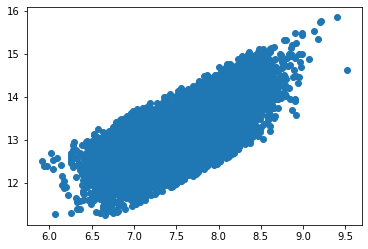

In [533]:
#scatter plot
plt.scatter(X2["sqft_living"], y)

In [573]:
# Splitting the dataset into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 10)

### Performing Linear Regression

In [574]:
#Training a Linear Regression Model
regressor = LinearRegression()

# Fitting the training data to our model
regressor.fit(X_train, y_train)

# Predicting price for the Validation set
y_pred = regressor.predict(X_test)

# Scoring the model

# R2 score closer to 1 is a good model
print(f"R2 score: {r2_score(y_test, y_pred)}")

# MSE score closer to zero is a good model
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.7315477688213606
MSE score: 0.07307634354686308


In [575]:
coeff_df = pd.DataFrame(regressor.coef_, X2.columns, columns=["Coefficient"])
coeff_df.round(3)


,Coefficient
sqft_living,0.391
sqft_lot,0.000
bathrooms,0.028
bedrooms,-0.023
condition,0.096
grade,0.147
sqft_living15,0.000
sqft_lot15,-0.000
lat,1.316
crimes,-0.000


In [576]:
test_df = pd.DataFrame({"Actual": np.exp(y_test), "Predicted": np.exp(y_pred)})
test_df["Diff"] = test_df.Actual - test_df.Predicted
test_df = test_df.round().sample(15)
test_df

,Actual,Predicted,Diff
2762,385000.0,423539.0,-38539.0
17597,337000.0,289719.0,47281.0
17277,624900.0,634017.0,-9117.0
15473,422000.0,441305.0,-19305.0
4815,375000.0,338962.0,36038.0
16053,247500.0,352171.0,-104671.0
18242,1390000.0,923920.0,466080.0
20094,436000.0,445054.0,-9054.0
17805,184900.0,201564.0,-16664.0
9350,329950.0,309079.0,20871.0


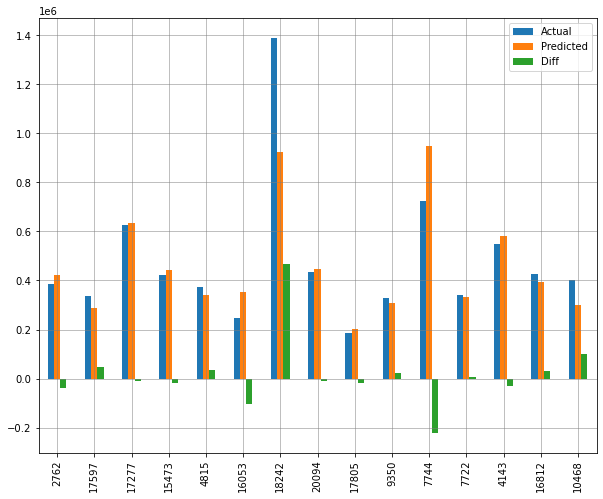

In [577]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [423]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21287261781045813
Mean Squared Error: 0.07392785738322574
Root Mean Squared Error: 0.271896777073995


## 07 Data Visualization
_Communicate the findings with key stakeholders using plots and interactive visualizations._
